In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

df = pd.read_csv("deliveries_updated_mens_ipl_upto_2024.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   matchId           260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   over_ball         260920 non-null  float64
 3   over              260920 non-null  int64  
 4   ball              260920 non-null  int64  
 5   batting_team      260920 non-null  object 
 6   bowling_team      260920 non-null  object 
 7   batsman           260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   bowler            260920 non-null  object 
 10  batsman_runs      260920 non-null  int64  
 11  extras            260920 non-null  int64  
 12  isWide            8381 non-null    float64
 13  isNoBall          1093 non-null    float64
 14  Byes              673 non-null     float64
 15  LegByes           4001 non-null    float64
 16  Penalty           2 

,matchId,inning,over_ball,over,ball,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,8381.000000,1093.000000,673.000000,4001.000000,2.0
mean,9.070665e+05,1.483531,9.560015,9.197677,3.623452,1.265001,0.067806,1.201050,1.032022,1.866270,1.307673,5.0
std,3.679913e+05,0.502643,5.686116,5.683484,1.813850,1.639298,0.343265,0.783803,0.314310,1.312692,0.852387,0.0
min,3.359820e+05,1.000000,0.100000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
25%,5.483340e+05,1.000000,4.500000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
50%,9.809670e+05,1.000000,9.400000,9.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
75%,1.254066e+06,2.000000,14.400000,14.000000,5.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0
max,1.426312e+06,6.000000,19.900000,19.000000,11.000000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0


In [3]:
df.isnull().sum()

matchId                  0
inning                   0
over_ball                0
over                     0
ball                     0
batting_team             0
bowling_team             0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extras                   0
isWide              252539
isNoBall            259827
Byes                260247
LegByes             256919
Penalty             260918
dismissal_kind      247970
player_dismissed    247970
date                     0
dtype: int64

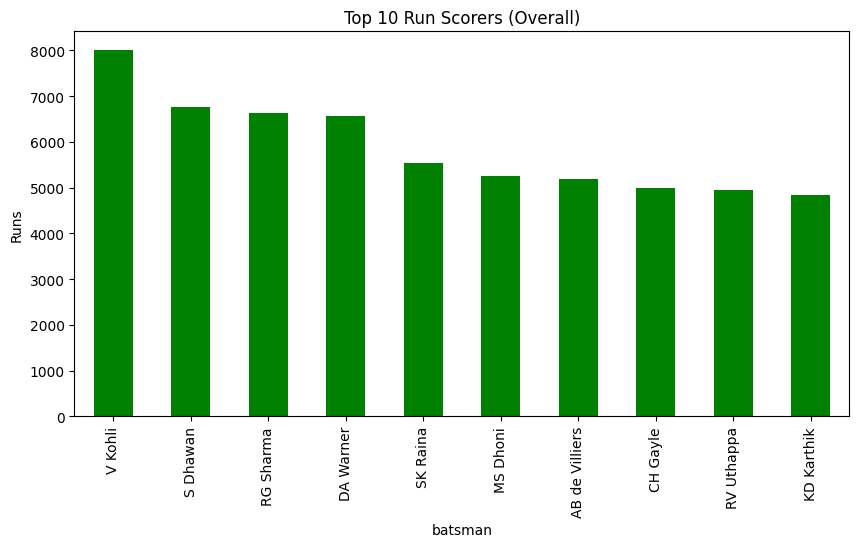

In [6]:

top_batsmen = df.groupby("batsman")['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_batsmen.plot(kind="bar", color="green")
plt.title("Top 10 Run Scorers (Overall)")
plt.ylabel("Runs")
plt.show()


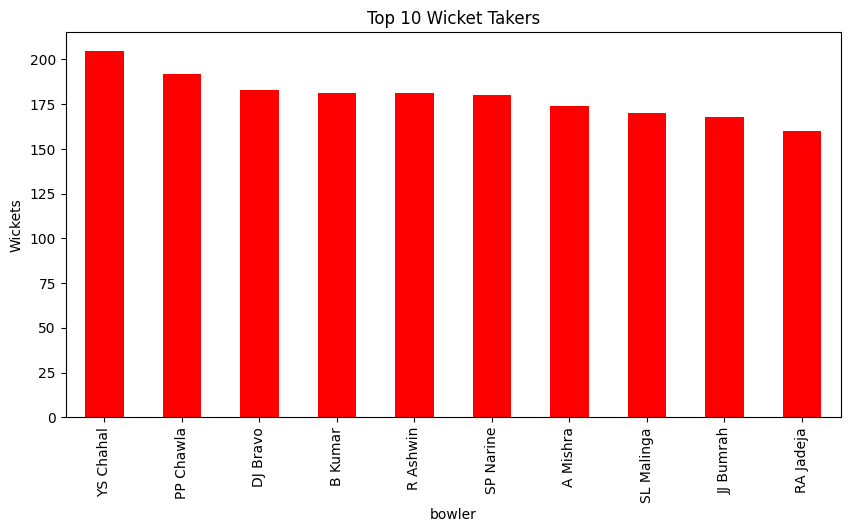

In [ ]:

wickets = df[df["player_dismissed"].notnull() & (df["dismissal_kind"] != "run out")]
top_bowlers = wickets.groupby("bowler")['player_dismissed'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_bowlers.plot(kind="bar", color="red")
plt.title("Top 10 Wicket Takers")
plt.ylabel("Wickets")
plt.show()


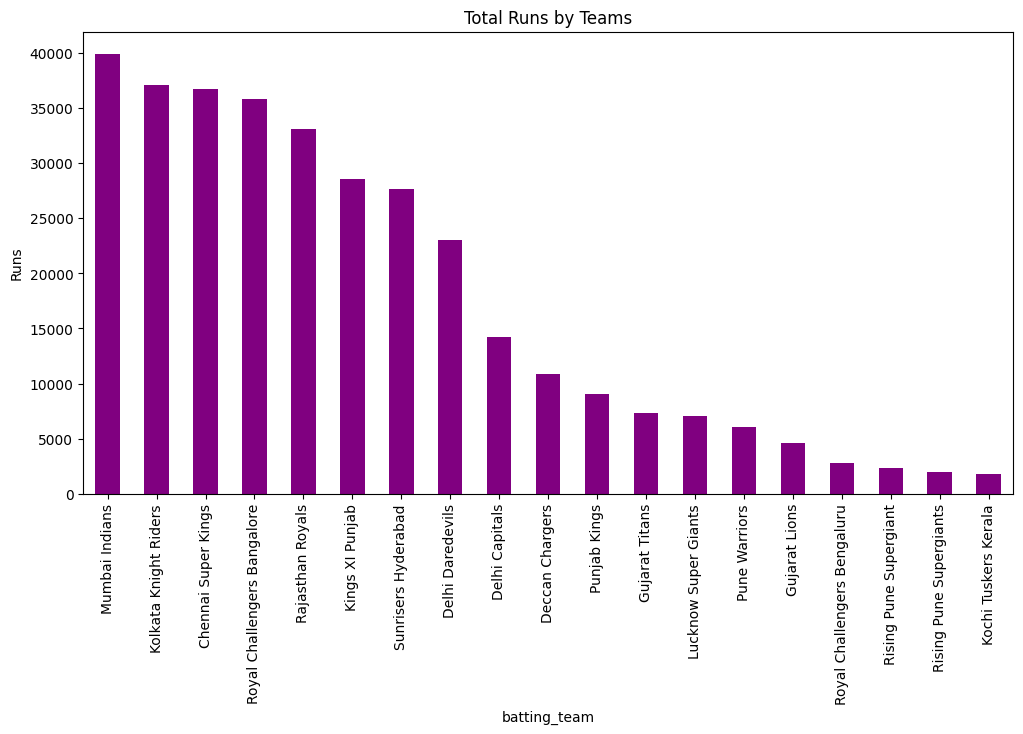

In [9]:
team_runs = df.groupby("batting_team")['batsman_runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
team_runs.plot(kind="bar", color="purple")
plt.title("Total Runs by Teams")
plt.ylabel("Runs")
plt.show()


In [ ]:
def phase(over):
    over = int(over)
    if over <= 5:    
        return "Powerplay (1-6)"
    elif over <= 14: 
        return "Middle Overs (7-15)"
    else:            
        return "Death Overs (16-20)"

df["phase"] = df["over"].apply(phase)

print(df["phase"].value_counts())  


phase
Middle Overs (7-15)    119552
Powerplay (1-6)         81905
Death Overs (16-20)     59463
Name: count, dtype: int64


Over range in data: 0–19 | Rows in death overs: 59463


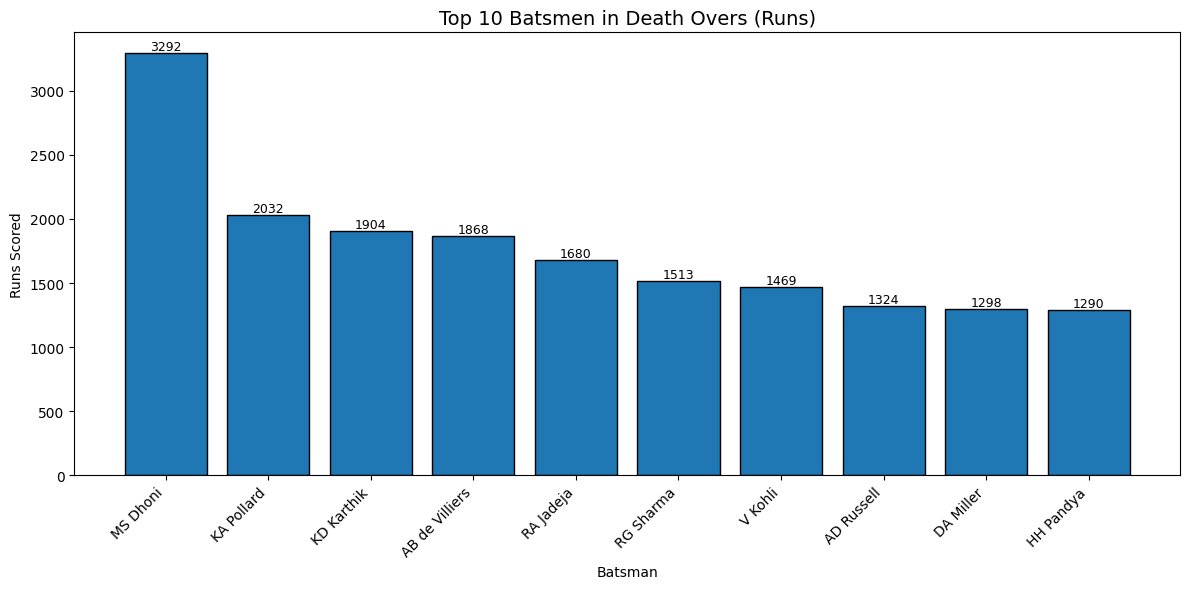

In [54]:


# Death overs (auto-detect indexing)
over_min, over_max = df["over"].min(), df["over"].max()
death_mask = ((df["over"] >= 15) & (df["over"] <= 19)) if over_min == 0 else ((df["over"] >= 16) & (df["over"] <= 20))

death_df = df.loc[death_mask].copy()
print(f"Over range in data: {over_min}–{over_max} | Rows in death overs: {len(death_df)}")

# Aggregate runs by batsman
death_batsmen = (
    death_df.groupby("batsman")["batsman_runs"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot bar graph
plt.figure(figsize=(12,6))
bars = plt.bar(death_batsmen.index, death_batsmen.values, edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Batsmen in Death Overs (Runs)", fontsize=14)
plt.xlabel("Batsman")
plt.ylabel("Runs Scored")

# Add value labels
for bar, val in zip(bars, death_batsmen.values):
    plt.text(bar.get_x() + bar.get_width()/2, val, int(val), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


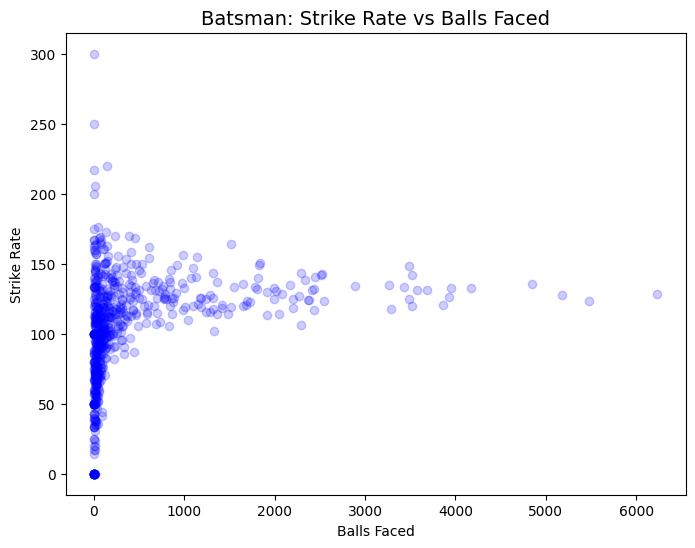

In [65]:
batsman_stats = df.groupby("batsman").agg(
    balls=("ball", "count"),
    runs=("batsman_runs", "sum")
).reset_index()
batsman_stats["strike_rate"] = batsman_stats["runs"] / batsman_stats["balls"] * 100

plt.figure(figsize=(8,6))
plt.scatter(batsman_stats["balls"], batsman_stats["strike_rate"], alpha=0.2, c="blue")
plt.title("Batsman: Strike Rate vs Balls Faced", fontsize=14)
plt.xlabel("Balls Faced")
plt.ylabel("Strike Rate")
plt.show()


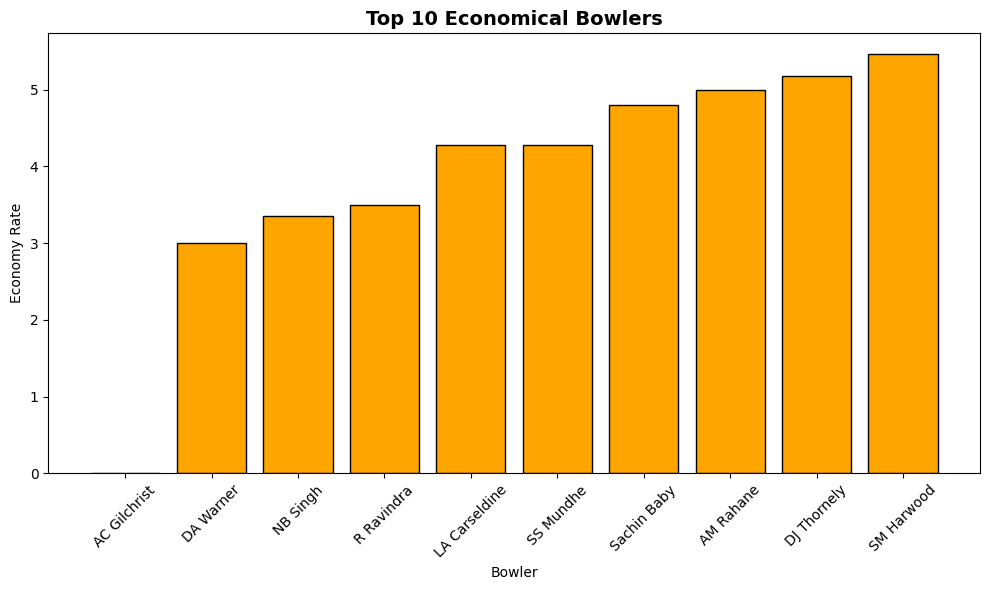

In [66]:
import matplotlib.pyplot as plt

# Calculate stats
bowler_stats = df.groupby("bowler").agg({
    "batsman_runs": "sum",
    "ball": "count"
})
bowler_stats["economy"] = bowler_stats["batsman_runs"] / (bowler_stats["ball"] / 6)

# Sort by best economy (lowest first)
top_economy = bowler_stats.sort_values("economy").head(10)

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(top_economy.index, top_economy["economy"], color="orange", edgecolor="black")



plt.title("Top 10 Economical Bowlers", fontsize=14, fontweight="bold")
plt.xlabel("Bowler")
plt.ylabel("Economy Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


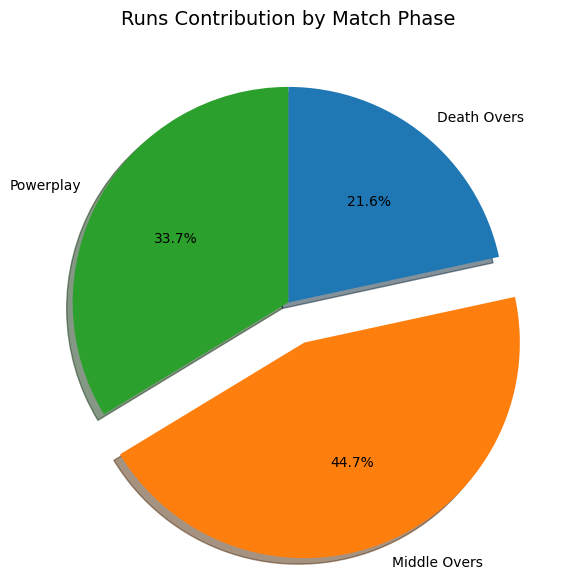

In [62]:
plt.figure(figsize=(7,7))
df.groupby("phase")["batsman_runs"].sum().plot.pie(
    autopct="%1.1f%%", startangle=90, counterclock=False, shadow=True, explode=[0,0.2,0]
)

plt.title("Runs Contribution by Match Phase", fontsize=14)
plt.ylabel("")
plt.show()


In [ ]:

a=df['batsman_runs'].value_counts().sort_index()
print(a)



batsman_runs
0    103940
1     96778
2     16453
3       783
4     29850
5        65
6     13051
Name: count, dtype: int64


'plt.title("Distribution of Runs per Ball")\nplt.xlabel("Runs Scored")\nplt.ylabel("Count")\nplt.show()'

Axes(0.125,0.11;0.775x0.77)


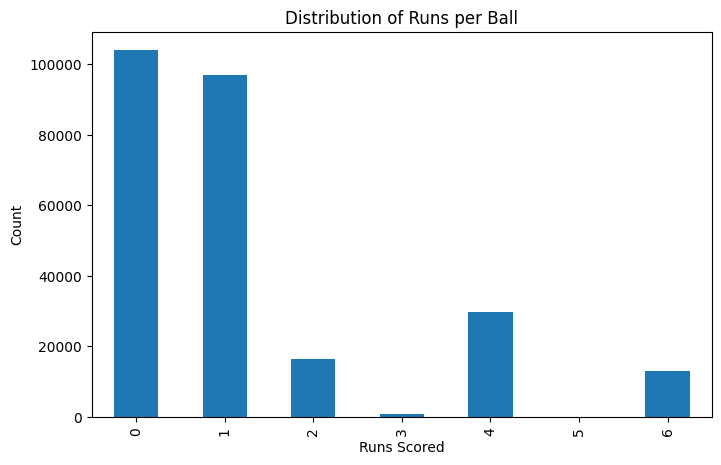

In [72]:
plt.figure(figsize=(8,5))
a=df['batsman_runs'].value_counts().sort_index().plot(kind='bar')
print(a)
plt.title("Distribution of Runs per Ball")
plt.xlabel("Runs Scored")
plt.ylabel("Count")
plt.show()


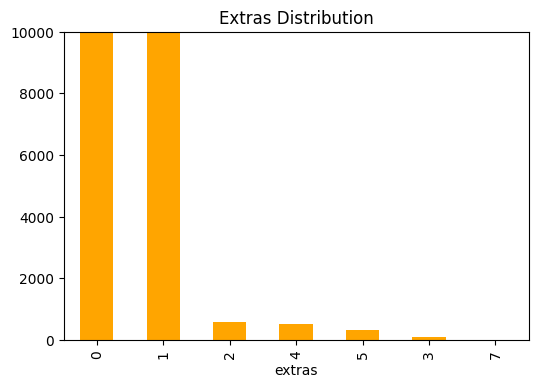

In [26]:
plt.figure(figsize=(6,4))
df['extras'].value_counts().plot(kind='bar', color="orange")
plt.title("Extras Distribution")
plt.ylim(0, 10000)
plt.show()


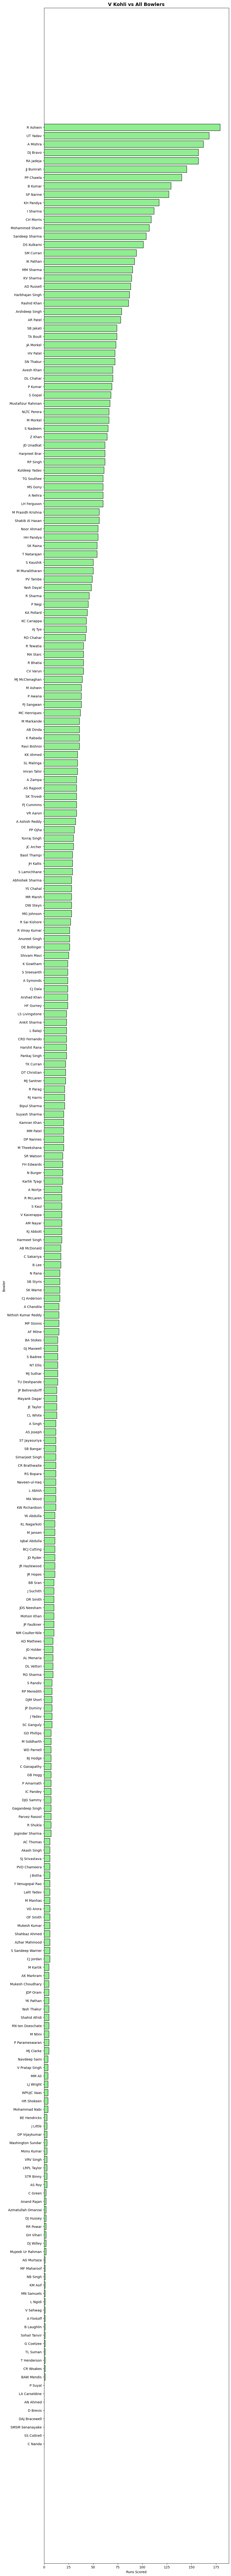

In [75]:

matchups = (
    df.groupby(["batsman", "bowler"])
    .agg(
        balls_faced=("ball", "count"),
        runs_scored=("batsman_runs", "sum"),
        dismissals=("player_dismissed", lambda x: x.notna().sum())
    )
    .reset_index()
)

matchups["strike_rate"] = (matchups["runs_scored"] / matchups["balls_faced"] * 100).round(2)


batsman_name = "V Kohli"
kohli_matchups = matchups[matchups["batsman"] == batsman_name].sort_values(by="runs_scored", ascending=False)
                                                                           
plt.figure(figsize=(10, len(kohli_matchups)//2)) 
plt.barh(kohli_matchups["bowler"], kohli_matchups["runs_scored"], color="lightgreen", edgecolor="black")



plt.title(f"{batsman_name} vs All Bowlers", fontsize=14, fontweight="bold")
plt.xlabel("Runs Scored")
plt.ylabel("Bowler")
plt.gca().invert_yaxis() 
plt.show()


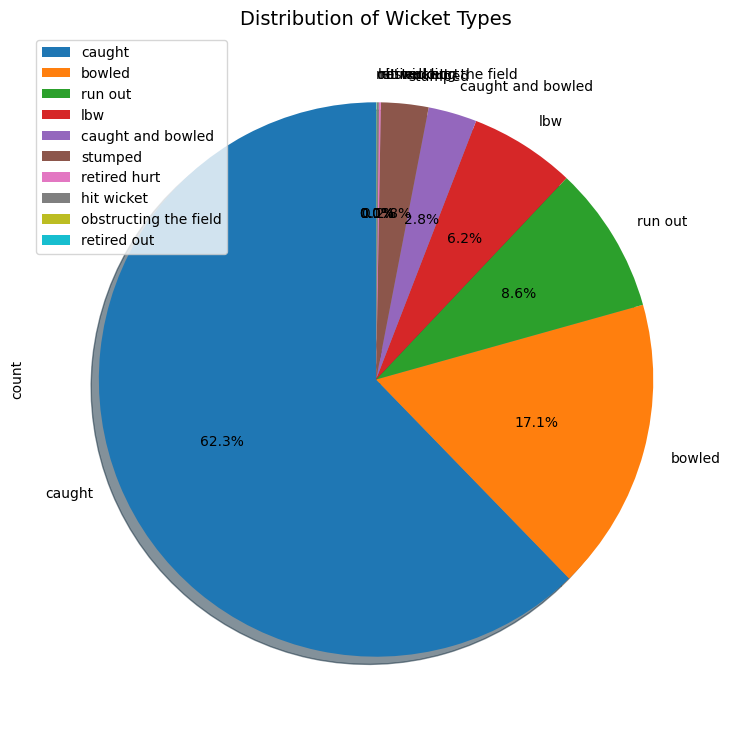

In [ ]:
plt.figure(figsize=(9,9))
df["dismissal_kind"].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90, shadow=True
)

plt.title("Distribution of Wicket Types", fontsize=14)
plt.legend()
plt.show()
